In [6]:
import numpy as np
import scipy.stats as stats
import scipy as sp 
import matplotlib.pyplot as plt

In [23]:
p=np.zeros([3,3])
p[0,0]=1
p[1,1]=1/np.sqrt(2)
p[1,2]=1/np.sqrt(2)
p[2,1]=1/np.sqrt(2)
p[2,2]=-1/np.sqrt(2)
eigen_matirx=np.zeros([3,3])
eigen_matirx[0,0]=1
eigen_matirx[1,1]=1/2
print(p,"\n", eigen_matirx)
covariance_matrix=p@eigen_matirx@np.linalg.inv(p)
print(covariance_matrix)

## so only psd

[[ 1.          0.          0.        ]
 [ 0.          0.70710678  0.70710678]
 [ 0.          0.70710678 -0.70710678]] 
 [[1.  0.  0. ]
 [0.  0.5 0. ]
 [0.  0.  0. ]]
[[1.   0.   0.  ]
 [0.   0.25 0.25]
 [0.   0.25 0.25]]


In [85]:
print(covariance_matrix==covariance_matrix.T)

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


In [73]:
def legrangian_to_max(a):
    a_1, a_2, a_3, shadow = a
    return a_1**2 + 0.25*(a_2**2 + a_3**2) + 0.5*a_2*a_3 - shadow*(np.linalg.norm([a_1,a_2,a_3]))

legrangian_to_min = lambda x: -1*legrangian_to_max(x)


result = sp.optimize.minimize(legrangian_to_max, x0=[.5,.5,.5,1])

print(result)


  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: -721588.2437057205
        x: [-6.995e+02  2.757e+02  2.757e+02  1.607e+03]
      nit: 2
      jac: [ 4.656e+00 -2.776e+02 -2.776e+02 -8.008e+02]
 hess_inv: [[ 5.387e-01 -1.058e-01 -1.058e-01  9.508e-01]
            [-1.058e-01  5.723e-01 -4.277e-01 -3.946e-01]
            [-1.058e-01 -4.277e-01  5.723e-01 -3.946e-01]
            [ 9.508e-01 -3.946e-01 -3.946e-01 -1.728e+00]]
     nfev: 577
     njev: 113


In [ ]:

def objective(a):
    a_1, a_2, a_3 = a
    return a_1**2 + 0.25*(a_2**2 + a_3**2) + 0.5*a_2*a_3 

def lagrangian(a, shadow):
    return objective(a) - shadow*(np.sqrt(a[0]**2 + a[1]**2 + a[2]**2) - 1)

min_funct = lambda x: objective(x)

constraints = [{'type': 'eq', 'fun': lambda x: np.sqrt(x[0]**2 + x[1]**2 + x[2]**2) - 1}]

result = sp.optimize.minimize(lagrangian, x0=[1, 1, 1, 1], args=(2,), constraints=constraints)

print(result)

In [86]:
a=[0,(1/np.sqrt(2)),(1/np.sqrt(2))]
def objective(a):
    a_1, a_2, a_3 = a
    return a_1**2 + 0.25*(a_2**2 + a_3**2) + 0.5*a_2*a_3 
objective(a) ##.5 
a=[1,0,0]
objective(a) ##!1
a=[0,1/np.sqrt(2),1/np.sqrt(2)] ##.66 
print(objective(a) )
a=[0,1/np.sqrt(2),-1/np.sqrt(2)] ##.66 
objective(a) 

0.4999999999999999


0.0

In [82]:
covariance_matrix
a=np.array([0,-1,1])
np.dot(covariance_matrix,a)

array([0., 0., 0.])

In [90]:
covariance_matrix=np.zeros([3,3])
covariance_matrix[0,:]=[100,-80,10]
covariance_matrix[1,:]=[-80,81,50]
covariance_matrix[2,:]=[10,50,100]
covariance_matrix

array([[100., -80.,  10.],
       [-80.,  81.,  50.],
       [ 10.,  50., 100.]])

In [93]:
def find_variance(a, covariance_matrix):
    return np.dot(a,covariance_matrix)@a
a=np.array([1,1,0])
print(find_variance(a,covariance_matrix))
a=np.array([1,0,1])
print(find_variance(a,covariance_matrix))
a=np.array([0,1,1])
print(find_variance(a,covariance_matrix))

21.0
220.0
281.0


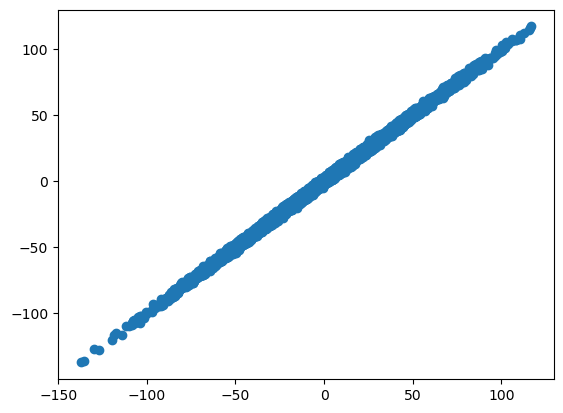

(array([[   8.,   56.,  329., 1130., 2382., 2855., 1998.,  923.,  284.,
           35.],
        [   8.,   56.,  321., 1133., 2409., 2830., 2000.,  924.,  283.,
           36.]]),
 array([-137.41619433, -111.98189154,  -86.54758875,  -61.11328596,
         -35.67898317,  -10.24468038,   15.18962241,   40.6239252 ,
          66.05822799,   91.49253078,  116.92683357]),
 <a list of 2 BarContainer objects>)

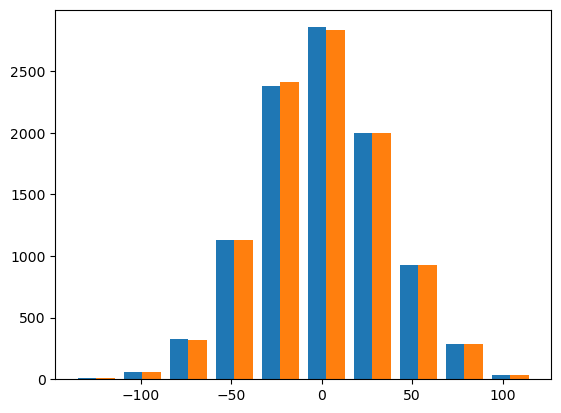

In [136]:
sigma_signal=50
sigma_noise=np.identity(2)*1
x=stats.norm(loc=0, scale=sigma_signal)
z=stats.multivariate_normal(mean=[0,0],cov=sigma_noise)
v=np.array([1/np.sqrt(2),1/np.sqrt(2)])
def y(n):
    ellement_wise_multiply = lambda v,n: np.array([v*x_i for x_i in x.rvs(n)])
    return ellement_wise_multiply(v,n)+z.rvs(size=n)
samples=y(10000)
plt.scatter(samples[:,0],samples[:,1])
plt.show()
plt.hist(samples)


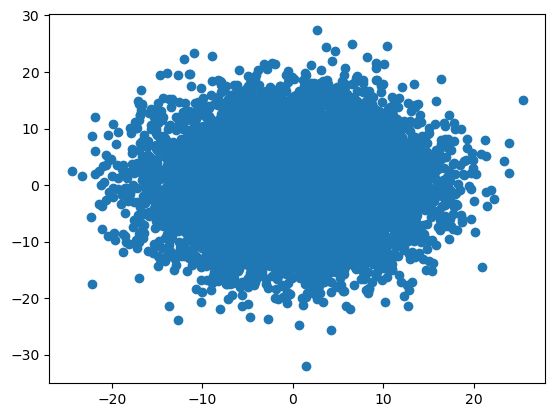

(array([[0.000e+00, 2.200e+01, 2.160e+02, 9.740e+02, 2.396e+03, 3.275e+03,
         2.221e+03, 7.640e+02, 1.250e+02, 7.000e+00],
        [1.000e+00, 1.800e+01, 1.870e+02, 9.770e+02, 2.477e+03, 3.226e+03,
         2.215e+03, 7.420e+02, 1.430e+02, 1.400e+01]]),
 array([-32.05511422, -26.11658044, -20.17804665, -14.23951286,
         -8.30097908,  -2.36244529,   3.57608849,   9.51462228,
         15.45315606,  21.39168985,  27.33022363]),
 <a list of 2 BarContainer objects>)

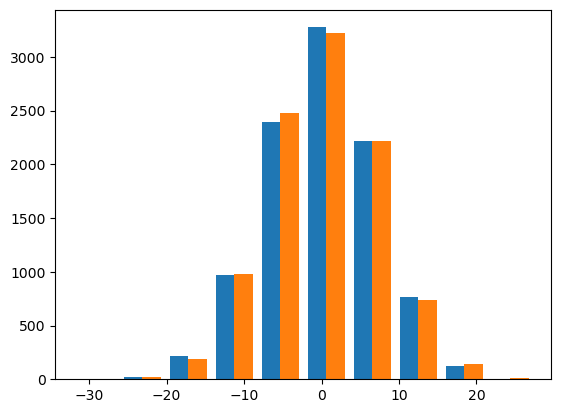

In [137]:
sigma_signal=1
sigma_noise=np.identity(2)*50
x=stats.norm(loc=0, scale=sigma_signal)
z=stats.multivariate_normal(mean=[0,0],cov=sigma_noise)
v=np.array([1/np.sqrt(2),1/np.sqrt(2)])
def y(n):
    ellement_wise_multiply = lambda v,n: np.array([v*x_i for x_i in x.rvs(n)])
    return ellement_wise_multiply(v,n)+z.rvs(size=n)
samples=y(10000)
plt.scatter(samples[:,0],samples[:,1])
plt.show()
plt.hist(samples)


In [16]:
from data import findata_tools
df = findata_tools.load_dataframe(r'/home/buzgalbraith/work/school/spring_2023/probaility-theroy-2-2023/homework_code/homework_8/data/stockprices.csv')

In [29]:
def center_data(df):
    center_data=df.copy()
    for col in df.columns:
        center_data[col]=df[col]-np.mean(df[col])
    return center_data
centerd_data=center_data(df)
centerd_data

,AAPL,AMZN,MSFT,GOOG,XOM,APC,CVX,C,GS,JPM,AET,JNJ,DGX,SPY,XLF,SSO,SDS,USO
date,,,,,,,,,,,,,,,,,,
2017-01-03,-50.41141,-490.017113,-21.41625,-221.370162,5.701167,11.706657,-1.828875,-8.112519,1.082154,-14.710909,-41.761741,-16.29825,-11.513875,-34.946781,-2.964125,-24.203882,14.360575,-0.343385
2017-01-04,-50.53741,-486.507113,-21.68545,-220.610162,4.784467,12.254657,-1.856575,-7.327319,2.601754,-14.558409,-40.647841,-16.47855,-10.920275,-33.656781,-2.780625,-23.304082,13.691275,-0.203385
2017-01-05,-49.96531,-463.237113,-21.68545,-213.490162,3.556167,13.037457,-2.328875,-8.351919,0.838554,-15.321009,-40.129941,-15.33025,-11.284075,-33.830081,-3.012425,-23.442482,13.730675,-0.083385
2017-01-06,-48.70481,-447.697113,-21.16625,-201.360162,3.510367,13.164657,-2.764175,-8.150819,4.326054,-15.311509,-40.374241,-15.86165,-11.495775,-33.050281,-2.935125,-22.878782,13.297575,-0.103385
2017-01-09,-47.65771,-446.767113,-21.35855,-200.860162,2.171967,11.442457,-3.690175,-8.466819,2.367954,-15.254309,-41.429541,-15.88065,-11.101275,-33.772281,-3.089725,-23.393082,13.651875,-0.473385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-14,60.02949,726.502887,31.29465,165.019838,4.473067,5.603657,5.279025,3.436881,-5.925546,14.389491,40.450059,12.38445,6.979325,36.103619,2.259575,25.802418,-11.074625,2.716615
2018-09-17,54.09019,664.342887,30.06995,148.539838,4.958167,6.558057,5.407725,3.772181,-7.270146,14.724391,42.464959,12.85145,6.425425,34.579419,2.140775,24.427618,-10.678125,2.686615
2018-09-18,54.44899,697.362887,31.13535,153.709838,5.175967,7.333457,6.021725,4.245581,-6.274146,15.177591,43.133359,13.42785,6.019925,36.133219,2.279275,25.772618,-11.064725,2.906615


In [63]:
def sample_mean(x):
    out=0
    for x_i in x:
        out=out+x_i
    return out/len(x)
def sample_variance(x):
    inner_term=x-sample_mean(x)
    return sample_mean(inner_term**2)
def sample_covariance(x,y):
    out=0
    expected_x=sample_mean(x)
    expected_y=sample_mean(y)
    for i in range(len(x)):
        out+=(x[i]-expected_x)*(y[i]-expected_y)
    return out/(len(x)-1)
def sample_covariance_matrix(D):
    covariance_matrix=[]
    for x in D:
        temp=[]
        for y in D:
            temp.append(sample_covariance(D[x],D[y]))
        covariance_matrix.append(temp)
    return np.array(covariance_matrix)
covariance_matrix=sample_covariance_matrix(centerd_data)

In [75]:
eigen_values, eigen_vectors=np.linalg.eig(covariance_matrix)
top_2=np.argsort(eigen_values)[-2:]
top_2_eigen_vectors=eigen_values[top_2]
top_2_eigenvalues=eigen_vectors[:,top_2]